In [1]:
import pandas as pd
import pywhatkit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df= pd.read_csv('C:/Users/ASUS/Downloads/comparison - MLR_Future (1).csv')
print(df)





     date  Predicted Fouling Resistance  Actual Fouling Resistance  \
0       1                      0.004707                   0.004808   
1       2                      0.004708                   0.004854   
2       3                      0.005001                   0.005034   
3       4                      0.005258                   0.005210   
4       5                      0.005230                   0.005248   
..    ...                           ...                        ...   
169   170                      0.008521                        NaN   
170   171                      0.008499                        NaN   
171   172                      0.008475                        NaN   
172   173                      0.008451                        NaN   
173   174                      0.008425                        NaN   

     FuturePredictions  
0             0.008786  
1             0.008785  
2             0.008784  
3             0.008782  
4             0.008779  
..       

In [2]:
fv = list()
fvs=[]
fv=  df['Predicted Fouling Resistance'].dropna()

for each in fv:
  fvs.append(each)
print(fvs)


[0.004707, 0.0047079999999999995, 0.005000999999999999, 0.005258, 0.005229999999999999, 0.005692, 0.006344, 0.0061649999999999995, 0.0058, 0.005166, 0.005414, 0.005503, 0.005956, 0.006241, 0.006372, 0.006562, 0.006220000000000001, 0.006213000000000001, 0.006351, 0.0068379999999999995, 0.007026999999999999, 0.006958, 0.007069, 0.007083, 0.006529999999999999, 0.006447, 0.006499, 0.007049, 0.007242, 0.007455, 0.007273000000000001, 0.007076000000000001, 0.007311, 0.007425, 0.0075060000000000005, 0.007134000000000001, 0.007281999999999999, 0.006670000000000001, 0.006594, 0.006851, 0.0067079999999999996, 0.007254999999999999, 0.007206999999999999, 0.007088, 0.007054, 0.0072180000000000005, 0.007479, 0.007338, 0.0073019999999999995, 0.007974, 0.007818, 0.007667, 0.007201999999999999, 0.0073420000000000004, 0.007437999999999999, 0.007598000000000001, 0.008034999999999999, 0.007669, 0.0076370000000000006, 0.007958, 0.008062999999999999, 0.007195999999999999, 0.007517, 0.007575, 0.00756800000000

In [3]:
x=[]
for i in range(1,len(fvs)+1):
  x.append(i)
print(x)

# IQR

Q1 = np.percentile(fvs, 25, interpolation='midpoint')
Q3 = np.percentile(fvs, 75, interpolation='midpoint')
IQR = Q3 - Q1
print(IQR,"Inter quartie range")



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]
0.0012799999999999999 Inter quartie range


0.007762195402298851


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

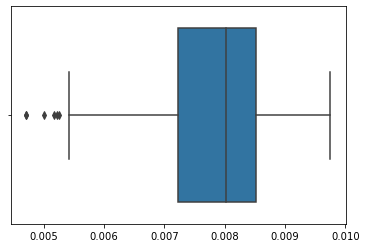

In [11]:
threshold =  sum(fvs)/len(x)
print(threshold)

plt.plot(fvs,x,color='blue')

sns.boxplot(fvs)




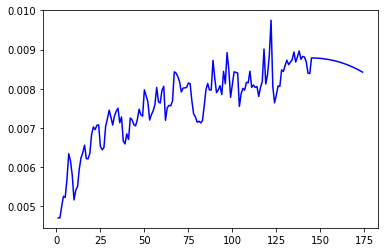

In [5]:

plt.plot(x,fvs,color='blue')
plt.show()


In [6]:
# Code to allocate points as safe , alert or high risk depending upon threshold and Q3 value in statistics
highriskpoints = []
highx = []
safepoints = []
safex=[]
alertpoints = []
alertx =[]
for i in range(len(fvs)):
  if fvs[i] > threshold and fvs[i] > Q3:
    highriskpoints.append(fvs[i])
    highx.append(i+1)
  elif fvs[i] > threshold and fvs[i] < Q3 :
    alertpoints.append(fvs[i])
    alertx.append(i)
  elif fvs[i] < threshold and fvs[i] > Q3:
    alertpoints.append(fvs[i])
    alertx.append(i)
  elif fvs[i] < threshold and fvs[i] < Q3:
    safepoints.append(fvs[i])
    safex.append(i)
print("OK")





OK


In [11]:
print("yes")

s1 = set(highriskpoints)
s2 = set(alertpoints)
s3 = set(safepoints)
     
    # Calculates intersection of
    # sets on s1 and s2
set1 = s1.intersection(s2)        
     
    # Calculates intersection of sets
    # on set1 and s3
result_set = set1.intersection(s3)
     
    # Converts resulting set to list
final_list = list(result_set)
print(final_list)





yes
[]


In [8]:
getrecommendations = int(input("Enter the day for which you want suggestions and information"))
if getrecommendations in highx:
    pywhatkit.sendwhatmsg("+917709080178","HIGH SYSTEM EMERGENCY ALERT NOTIFICATION ***IMPORTANT URGENT****  Heat Exchanger has to be stopped and new cycle needs to be started!",21,21)
elif getrecommendations in safex:
  pywhatkit.sendwhatmsg("+917709080178","  SYSTEM NOTIFICATION    Heat Exchanger is working well with no threats!!",21,21)
elif getrecommendations in alertx:
  pywhatkit.sendwhatmsg("+919545456891","  SYSTEM ALERT NOTIFICATION  Heat Exchangers need to be cleaned and system check must be done",21,21)

  


Enter the day for which you want suggestions and information155
In 62 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!


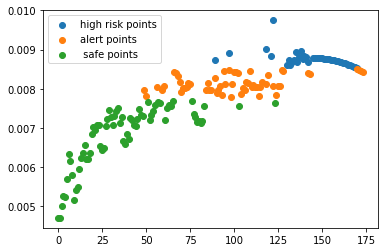

done


In [7]:
# plot lines
plt.scatter(highx,highriskpoints,label = "high risk points")
plt.scatter(alertx,alertpoints,label="alert points")
plt.scatter(safex,safepoints,label = " safe points")
plt.legend()
plt.ioff()
plt.show()
plt.close()
print("done")







In [ ]:
#pywhatkit.sendwhatmsg("+919545456891", "Geeks For Geeks!", 20, 6)